In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

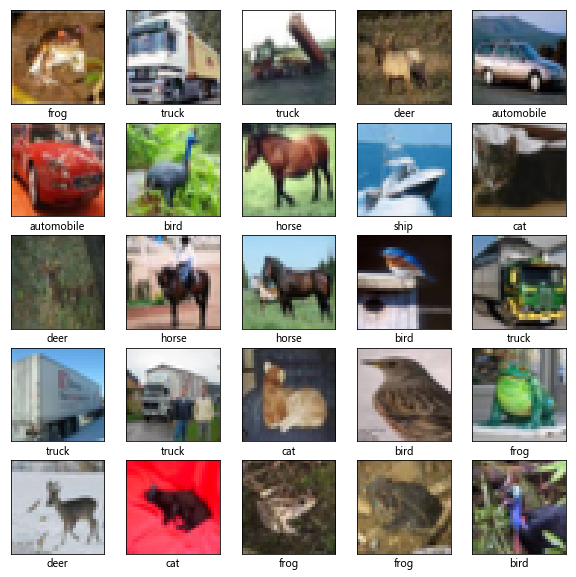

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='SAME'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='SAME'))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))

In [39]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 256)       

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

In [41]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 256)       

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 40s 792us/sample - loss: 0.9592 - accuracy: 0.6599 - val_loss: 0.8927 - val_accuracy: 0.6917
Epoch 2/10
50000/50000 [==============================] - 38s 768us/sample - loss: 0.7425 - accuracy: 0.7391 - val_loss: 0.8000 - val_accuracy: 0.7342
Epoch 3/10
50000/50000 [==============================] - 38s 758us/sample - loss: 0.6004 - accuracy: 0.7895 - val_loss: 0.7537 - val_accuracy: 0.7482
Epoch 4/10
50000/50000 [==============================] - 38s 765us/sample - loss: 0.4831 - accuracy: 0.8294 - val_loss: 0.7653 - val_accuracy: 0.7545
Epoch 5/10
50000/50000 [==============================] - 39s 773us/sample - loss: 0.3819 - accuracy: 0.8651 - val_loss: 0.8022 - val_accuracy: 0.7555
Epoch 6/10
50000/50000 [==============================] - 39s 782us/sample - loss: 0.3053 - accuracy: 0.8924 - val_loss: 0.8872 - val_accuracy: 0.7526
Epoch 7/10
50000/50000 [====================

10000/1 - 3s - loss: 1.1878 - accuracy: 0.7522


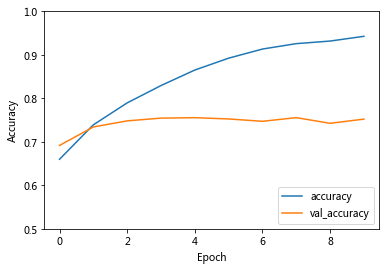

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('result.png')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [53]:
print('{:.2%}'.format(test_acc))

75.22%
